# Text Cleaning

### Helper Functions

I did a good bit of consolidation into categories here:

* **Mood Disorder** includes Depression and Seasonal Affective Disorder  
* **Pervasive Developmental Disorder** includes Autism and Aspergers  
* **Dissociative Disorder** includes Depersonalization Disorder 
* **Personality Disorder** includes Schizotypal Personality Disorder

In [1]:
import re
import pandas as pd

def cleanDisorders(disorder):
    disorder = re.sub("[\(\[].*?[\)\]]", "", str(disorder))
    disorder = disorder.rstrip()
    if disorder == 'Attention Deficit Hyperactivity Disorder':
        return 'ADHD'
    elif disorder == 'Post-traumatic Stress Disorder':
        return "PTSD"
    elif disorder == 'Obsessive-Compulsive Disorder':
        return "OCD"
    elif disorder == 'Anxiety Disorder':
        return "Anxiety"
    elif disorder == 'Autism' or disorder.lower() == 'autism spectrum disorder' or disorder == 'Asperges' or disorder == 'PDD-NOS':
        return 'Pervasive Developmental Disorder'
    elif disorder == 'Depression' or disorder == 'Seasonal Affective Disorder':
        return "Mood Disorder"
    elif disorder == 'Addictive Disorder' or disorder == 'Substance Use Disorder':
        return "Addiction or Substance Use"
    elif disorder.lower() == 'depersonalization disorder':
        return "Dissociative Disorder"
    elif disorder == 'Schizotypal Personality Disorder':
        return "Personality Disorder"
    else:
        return disorder
    
def loadData(filename):
    df = pd.read_csv(filename)
    print('\nShape:')
    print(df.shape)
    return df

def cleanAndGetCounts(df, qID, cleanFn):
    df[qID] = df[qID].apply(cleanFn)
    valCounts = df[qID].value_counts()
    valCounts = valCounts.iloc[1:]
    print(valCounts)
    return valCounts

### 2016 Diagnosed Mental Health Conditions

In [2]:
df2016 = loadData('data/QA_2016.T.csv')
valCounts = cleanAndGetCounts(df2016, '115', cleanDisorders)


Shape:
(4760, 61)
Mood Disorder                                                                                               775
Anxiety                                                                                                     648
ADHD                                                                                                        224
Addiction or Substance Use                                                                                  163
PTSD                                                                                                        141
Stress Response Syndromes                                                                                   104
Personality Disorder                                                                                         91
OCD                                                                                                          68
Eating Disorder                                                                      

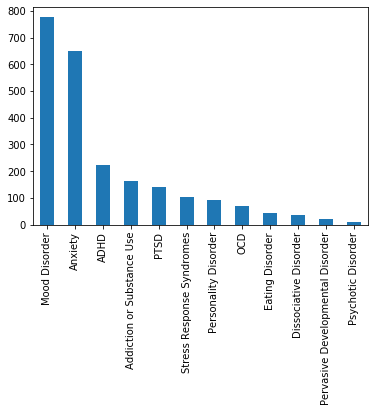

In [4]:
valCounts.sort_values(ascending=False).head(12).plot(kind='bar')

### 2016 Undiagnosed Mental Health Conditions

In [5]:
df16 = loadData('data/QA_2016.T.csv')
valCts = cleanAndGetCounts(df16, '116', cleanDisorders)


Shape:
(4760, 61)
Mood Disorder                       442
Anxiety                             389
ADHD                                132
Stress Response Syndromes           100
Personality Disorder                 90
Addiction or Substance Use           82
PTSD                                 56
OCD                                  52
Dissociative Disorder                24
Eating Disorder                      19
Psychotic Disorder                   18
Gender Identity Disorder              4
Burnout                               3
Asperger Syndrome                     3
Depersonalisation                     2
post-partum / anxiety                 2
Pervasive Developmental Disorder      1
Suicidal Ideation                     1
Tinnitus                              1
Asperger's                            1
We're all hurt, right?!               1
Name: 116, dtype: int64


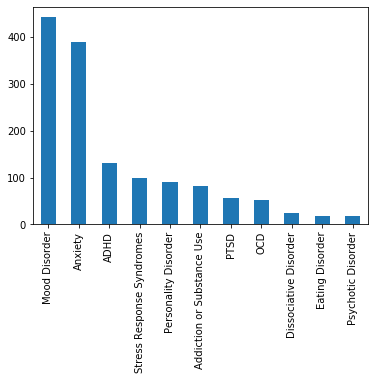

In [6]:
valCts.sort_values(ascending=False).head(11).plot(kind='bar')

# Next Section

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import numpy as np
import seaborn as sns
import plotly.express as px

def load_data(url):
    url_content = requests.get(url).text



    #with open()
    data = pd.read_csv(url,encoding='utf-8')
    return data
#data.head()

In [2]:
def clean_data(df):
    df = df.replace('-1',np.NaN)
    index = 0
    for row in df['3']:
        if row != 'United States of America':
            df.drop(index=index,inplace=True)
        index += 1
    data_index = df.index

    index = 0 
    for row in df['5']:
        if row == 1:
            df.drop(index=data_index[index],inplace=True)
        index += 1
    return df

In [3]:
def q_17(data):
    comfort_sum = 0
    comfort_count = 0
    for row in data['19']:
        if row == 'Yes':
            comfort_sum += 100
        elif row == 'Maybe':
            comfort_sum += 50
        elif row == 'No':
            comfort_sum += 0
        comfort_count  += 1
    if comfort_count == 0:
        avg_comfort = 0
    else:
        avg_comfort = comfort_sum/comfort_count
    #print(avg_comfort)
    comfort_coworkers = avg_comfort
    return comfort_coworkers
def q_17_size(data):
    comfort_sum = 0
    comfort_count = 0
    for row in data:
        if row == 'Yes':
            comfort_sum += 100
        elif row == 'Maybe':
            comfort_sum += 50
        elif row == 'No':
            comfort_sum += 0
        comfort_count  += 1
    if comfort_count == 0:
        avg_comfort = 0
    else:
        avg_comfort = comfort_sum/comfort_count
    #print(avg_comfort)
    comfort_coworkers = avg_comfort
    return comfort_coworkers
def pie_17(data):
    yes = 0
    maybe = 0
    no = 0
    for row in data['19']:
        if row == 'Yes':
            yes += 1
        elif row == 'Maybe':
            maybe += 1
        elif row == 'No':
            no += 1
    return [yes,maybe,no]

In [4]:
def q_16(data):
    comfort_sum = 0
    comfort_count = 0
    for row in data['16']:
        if row == 'Yes':
            comfort_sum += 100
        elif row == 'I don\'t know':
            comfort_sum += 50
        elif row == 'No':
            comfort_sum += 0
        comfort_count  += 1
    if comfort_count == 0:
        avg_comfort = 0
    else:
        avg_comfort = comfort_sum/comfort_count
    
    comfort_coworkers = avg_comfort
    return comfort_coworkers
def pie_16(data):
    yes = 0
    maybe = 0
    no = 0
    for row in data['16']:
        if row == 'Yes':
            yes += 1
        elif row == 'I don\'t know':
            maybe += 1
        elif row == 'No':
            no += 1
    return [yes,maybe,no]

In [5]:
def q_18(data):
    comfort_sum = 0
    comfort_count = 0
    for row in data['18']:
        if row == 'Yes':
            comfort_sum += 100
        elif row == 'Maybe':
            comfort_sum += 50
        elif row == 'No':
            comfort_sum += 0
        comfort_count  += 1
    if comfort_count == 0:
        avg_comfort = 0
    else:
        avg_comfort = comfort_sum/comfort_count
    
    comfort_coworkers = avg_comfort
    return comfort_coworkers
def pie_18(data):
    yes = 0
    maybe = 0
    no = 0
    for row in data['18']:
        if row == 'Yes':
            yes += 1
        elif row == 'Maybe':
            maybe += 1
        elif row == 'No':
            no += 1
    return [yes,maybe,no]

In [6]:
def q_56(data):
    employer_mental_phys_sum = 0
    employer_ment_phys_count = 0
    for row in data['69']:
        if row == 'Mental health':
            employer_mental_phys_sum += 50
        elif row == 'Physical health':
            employer_mental_phys_sum += 0
        elif row == 'Same level of comfort for each':
            employer_mental_phys_sum += 100
        employer_ment_phys_count += 1
    if employer_ment_phys_count == 0:
        avg_employer_ment_phys = 0
    else:
        avg_employer_ment_phys = employer_mental_phys_sum / employer_ment_phys_count
    return avg_employer_ment_phys
def pie_56(data):
    mental = 0
    physical = 0
    same = 0
    for row in data['69']:
        if row == 'Mental health':
            mental += 1
        elif row == 'Physical health':
            physical += 1
        elif row == 'Same level of comfort for each':
            same += 1
    return [mental,physical,same]

In [7]:
def q_72(data):
    sum_ = 0
    count = 0
    for row in data['85']:
        if row == 1:
            sum_ += 0
        elif row == 2:
            sum_ += 25
        elif row == 3:
            sum_ += 50
        elif row == 4:
            sum_ += 75
        elif row == 5:
            sum_ += 100
        count += 1
    
    if count == 0:
        avg = 0
    else:
        avg = sum_ / count
    return avg
def pie_72(data):
    one = 0
    two = 0
    three = 0
    four = 0
    five = 0
    for row in data['85']:
        if row == 1:
            one += 1
        elif row == 2:
            two += 1
        elif row == 3:
            three += 1
        elif row == 4:
            four += 1
        elif row == 5:
            five += 1
    return [one,two,three,four,five]

In [8]:
url_16 = "https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2016.T.csv"
url_17 = "https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2017.T.csv"
url_18 = "https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2018.T.csv"
url_19 = "https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2019.T.csv"

data_16 = load_data(url_16)
data_17 = load_data(url_17)
data_18 = load_data(url_18)
data_19 = load_data(url_19)

data_16 = clean_data(data_16)
data_17 = clean_data(data_17)
data_18 = clean_data(data_18)
data_19 = clean_data(data_19)

In [9]:
def split_tech_non(df):
    # Tech, Non-Tech
    return df.loc[df['9'] == 1].copy(), df.loc[df['9'] == 0].copy()


data_16_t, data_16_n = split_tech_non(data_16)
data_17_t, data_17_n = split_tech_non(data_17)
data_18_t, data_18_n = split_tech_non(data_18)
data_19_t, data_19_n = split_tech_non(data_19)

In [10]:
company_size = {
    '1-5': '1-5',
    '6-25': '6-25',
    '26-100': '26-100',
    '100-500': '100-500',
    '500-1000': '500-1000',
    'More than 1000': '1000+'
}

In [11]:
def pie_by_size(df, _id):
    subset = df.dropna(subset=['8', _id])
    values = []
    for k, v in company_size.items():
        values.append(subset.loc[subset['8'] == k][['1', _id]].groupby(_id).count().values.flatten())
        
    return values

In [12]:
def pie_by_gender(df, _id):
    subset = df.dropna(subset=['2', _id])

    _m = subset.loc[subset['2'] == 'Male'].groupby(_id).count()['UserID'].values
    _f = subset.loc[subset['2'] == 'Female'].groupby(_id).count()['UserID'].values
    _q = subset[~subset['2'].str.contains('Male|Female')].groupby(_id).count()['UserID'].values
    
    return _m, _f, _q

Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? Tech vs Non Tech


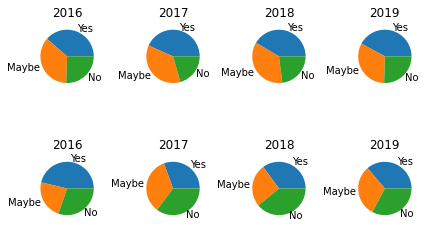

In [14]:
q_17_list_nontech = []
q_17_list_tech = []

q_17_list_nontech.append(q_17(data_16_n))
q_17_list_nontech.append(q_17(data_17_n))
q_17_list_nontech.append(q_17(data_18_n))
q_17_list_nontech.append(q_17(data_19_n))

q_17_list_tech.append(q_17(data_16_t))
q_17_list_tech.append(q_17(data_17_t))
q_17_list_tech.append(q_17(data_18_t))
q_17_list_tech.append(q_17(data_19_t))

years = [2016,2017,2018,2019]
#plt.plot(years,q_17_list)

pie_17_list16_t = pie_17(data_16_t)
pie_17_list16_n = pie_17(data_16_n)
pie_17_list17_t = pie_17(data_17_t)
pie_17_list17_n = pie_17(data_17_n)
pie_17_list18_t = pie_17(data_18_t)
pie_17_list18_n = pie_17(data_18_n)
pie_17_list19_t = pie_17(data_19_t)
pie_17_list19_n = pie_17(data_19_n)
answers = ['Yes','Maybe','No']
# referenced https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
plt.title('Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?')
print('Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? Tech vs Non Tech')
plt.subplot(2,4,1)
plt.pie(pie_17_list16_t,labels=answers)
plt.title('2016')
plt.subplot(2,4,2)
plt.pie(pie_17_list17_t,labels=answers)
plt.title('2017')
plt.subplot(2,4,3)
plt.pie(pie_17_list18_t,labels=answers)
plt.title('2018')
plt.subplot(2,4,4)
plt.pie(pie_17_list19_t,labels=answers)
plt.title('2019')
plt.subplot(2,4,5)
plt.pie(pie_17_list16_n,labels=answers)
plt.title('2016')
plt.subplot(2,4,6)
plt.pie(pie_17_list17_n,labels=answers)
plt.title('2017')
plt.subplot(2,4,7)
plt.pie(pie_17_list18_n,labels=answers)
plt.title('2018')
plt.subplot(2,4,8)
plt.pie(pie_17_list19_n,labels=answers)
plt.title('2019')
plt.tight_layout()

Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? (by number of employees in the company)
Row 1: 2016
Row 2: 2017
Row 3: 2018
Row 4: 2019


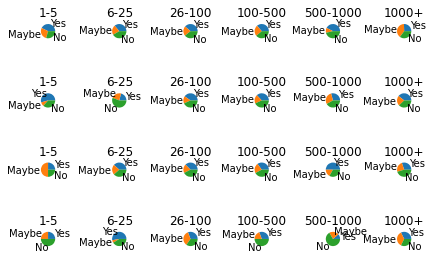

In [15]:
pie_16_19 = pie_by_size(data_16_t,'19')
pie_17_19 = pie_by_size(data_17_t,'19')
pie_18_19 = pie_by_size(data_18_t,'19')
pie_19_19 = pie_by_size(data_19_t,'19')

answers = ['Yes','Maybe','No']
plt.title('Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?')
print('Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? (by number of employees in the company)')
print('Row 1: 2016')
plt.subplot(4,6,1)
plt.pie(pie_16_19[0],labels=answers)
plt.title('1-5')
plt.subplot(4,6,2)
plt.pie(pie_16_19[1],labels=answers)
plt.title('6-25')
plt.subplot(4,6,3)
plt.pie(pie_16_19[2],labels=answers)
plt.title('26-100')
plt.subplot(4,6,4)
plt.pie(pie_16_19[3],labels=answers)
plt.title('100-500')
plt.subplot(4,6,5)
plt.pie(pie_16_19[4],labels=answers)
plt.title('500-1000')
plt.subplot(4,6,6)
plt.pie(pie_16_19[5],labels=answers)
plt.title('1000+')

print('Row 2: 2017')
plt.subplot(4,6,7)
plt.pie(pie_17_19[0],labels=answers)
plt.title('1-5')
plt.subplot(4,6,8)
plt.pie(pie_17_19[1],labels=answers)
plt.title('6-25')
plt.subplot(4,6,9)
plt.pie(pie_17_19[2],labels=answers)
plt.title('26-100')
plt.subplot(4,6,10)
plt.pie(pie_17_19[3],labels=answers)
plt.title('100-500')
plt.subplot(4,6,11)
plt.pie(pie_17_19[4],labels=answers)
plt.title('500-1000')
plt.subplot(4,6,12)
plt.pie(pie_17_19[5],labels=answers)
plt.title('1000+')

print('Row 3: 2018')
plt.subplot(4,6,13)
plt.pie(pie_18_19[0],labels=answers)
plt.title('1-5')
plt.subplot(4,6,14)
plt.pie(pie_18_19[1],labels=answers)
plt.title('6-25')
plt.subplot(4,6,15)
plt.pie(pie_18_19[2],labels=answers)
plt.title('26-100')
plt.subplot(4,6,16)
plt.pie(pie_18_19[3],labels=answers)
plt.title('100-500')
plt.subplot(4,6,17)
plt.pie(pie_18_19[4],labels=answers)
plt.title('500-1000')
plt.subplot(4,6,18)
plt.pie(pie_18_19[5],labels=answers)
plt.title('1000+')

print('Row 4: 2019')
plt.subplot(4,6,19)
plt.pie(pie_19_19[0],labels=answers)
plt.title('1-5')
plt.subplot(4,6,20)
plt.pie(pie_19_19[1],labels=answers)
plt.title('6-25')
plt.subplot(4,6,21)
plt.pie(pie_19_19[2],labels=answers)
plt.title('26-100')
plt.subplot(4,6,22)
plt.pie(pie_19_19[3],labels=answers)
plt.title('100-500')
plt.subplot(4,6,23)
plt.pie(pie_19_19[4],labels=answers)
plt.title('500-1000')
plt.subplot(4,6,24)
plt.pie(pie_19_19[5],labels=answers)
plt.title('1000+')
plt.tight_layout()

Text(0.5, 1.0, 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? (Over time)')

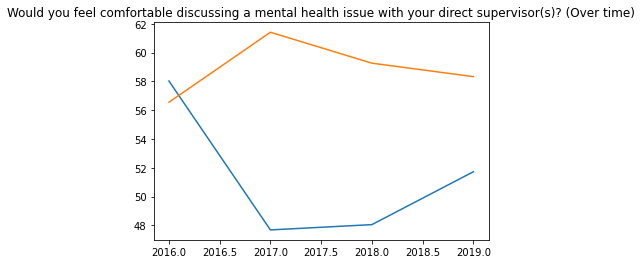

In [18]:
plt.plot(years,q_17_list_nontech)
plt.plot(years,q_17_list_tech)
plt.title('Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? (Over time)')
#q_17_data = pd.DataFrame(q_17_list,index=years)

Would you feel comfortable discussing a mental health issue with your coworkers? Tech vs Non Tech


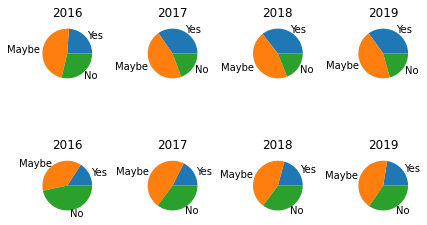

In [20]:
import plotly.express as px


q_18_list_nontech = []
q_18_list_tech = []

#q_17_list.append(q_17(data_16.query('9 == 1',inplace=True)))
q_18_list_nontech.append(q_18(data_16_n))
q_18_list_nontech.append(q_18(data_17_n))
q_18_list_nontech.append(q_18(data_18_n))
q_18_list_nontech.append(q_18(data_19_n))

q_18_list_tech.append(q_18(data_16_t))
q_18_list_tech.append(q_18(data_17_t))
q_18_list_tech.append(q_18(data_18_t))
q_18_list_tech.append(q_18(data_19_t))

years = [2016,2017,2018,2019]
#plt.plot(years,q_18_list)

pie_18_list16_t = pie_18(data_16_t)
pie_18_list16_n = pie_18(data_16_n)
pie_18_list17_t = pie_18(data_17_t)
pie_18_list17_n = pie_18(data_17_n)
pie_18_list18_t = pie_18(data_18_t)
pie_18_list18_n = pie_18(data_18_n)
pie_18_list19_t = pie_18(data_19_t)
pie_18_list19_n = pie_18(data_19_n)
answers = ['Yes','Maybe','No']
# referenced https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
plt.title('Would you feel comfortable discussing a mental health issue with your coworkers? Tech vs Non Tech')
print('Would you feel comfortable discussing a mental health issue with your coworkers? Tech vs Non Tech')
plt.subplot(2,4,1)
plt.pie(pie_18_list16_t,labels=answers)
plt.title('2016')
plt.subplot(2,4,2)
plt.pie(pie_18_list17_t,labels=answers)
plt.title('2017')
plt.subplot(2,4,3)
plt.pie(pie_18_list18_t,labels=answers)
plt.title('2018')
plt.subplot(2,4,4)
plt.pie(pie_18_list19_t,labels=answers)
plt.title('2019')
plt.subplot(2,4,5)
plt.pie(pie_18_list16_n,labels=answers)
plt.title('2016')
plt.subplot(2,4,6)
plt.pie(pie_18_list17_n,labels=answers)
plt.title('2017')
plt.subplot(2,4,7)
plt.pie(pie_18_list18_n,labels=answers)
plt.title('2018')
plt.subplot(2,4,8)
plt.pie(pie_18_list19_n,labels=answers)
plt.title('2019')
plt.tight_layout()


Text(0.5, 1.0, 'Would you feel comfortable discussing a mental health issue with your coworkers? (Over time)')

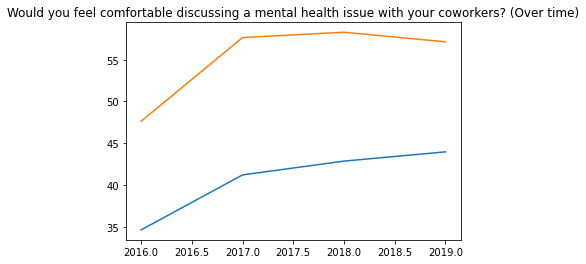

In [21]:
plt.plot(years,q_18_list_nontech)
plt.plot(years,q_18_list_tech)
plt.title('Would you feel comfortable discussing a mental health issue with your coworkers? (Over time)')

Overall, how well do you think the tech industry supports employees with mental health issues? Tech vs Non Tech


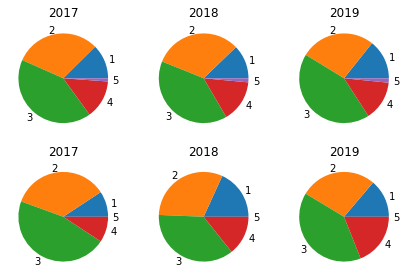

In [24]:
q_72_list_nontech = []
q_72_list_tech = []

#q_17_list.append(q_17(data_16.query('9 == 1',inplace=True)))

q_72_list_nontech.append(q_72(data_17_n))
q_72_list_nontech.append(q_72(data_18_n))
q_72_list_nontech.append(q_72(data_19_n))


q_72_list_tech.append(q_72(data_17_t))
q_72_list_tech.append(q_72(data_18_t))
q_72_list_tech.append(q_72(data_19_t))

years = [2017,2018,2019]
plt.plot(years,q_72_list_nontech)
plt.plot(years,q_72_list_tech)


pie_72_list17_t = pie_72(data_17_t)
pie_72_list17_n = pie_72(data_17_n)
pie_72_list18_t = pie_72(data_18_t)
pie_72_list18_n = pie_72(data_18_n)
pie_72_list19_t = pie_72(data_19_t)
pie_72_list19_n = pie_72(data_19_n)
answers = [1,2,3,4,5]
# referenced https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
plt.title('Overall, how well do you think the tech industry supports employees with mental health issues? Tech vs Non Tech')
print('Overall, how well do you think the tech industry supports employees with mental health issues? Tech vs Non Tech')

plt.subplot(2,3,1)
plt.pie(pie_72_list17_t,labels=answers)
plt.title('2017')
plt.subplot(2,3,2)
plt.pie(pie_72_list18_t,labels=answers)
plt.title('2018')
plt.subplot(2,3,3)
plt.pie(pie_72_list19_t,labels=answers)
plt.title('2019')

plt.subplot(2,3,4)
plt.pie(pie_72_list17_n,labels=answers)
plt.title('2017')
plt.subplot(2,3,5)
plt.pie(pie_72_list18_n,labels=answers)
plt.title('2018')
plt.subplot(2,3,6)
plt.pie(pie_72_list19_n,labels=answers)
plt.title('2019')
plt.tight_layout()

Text(0.5, 1.0, 'Overall, how well do you think the tech industry supports employees with mental health issues? (Over time)')

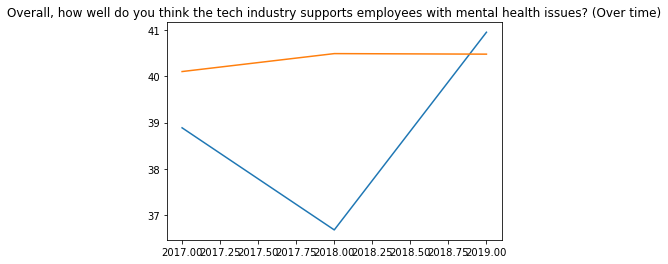

In [25]:
plt.plot(years,q_72_list_nontech)
plt.plot(years,q_72_list_tech)
plt.title('Overall, how well do you think the tech industry supports employees with mental health issues? (Over time)')

Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? Tech vs Non Tech


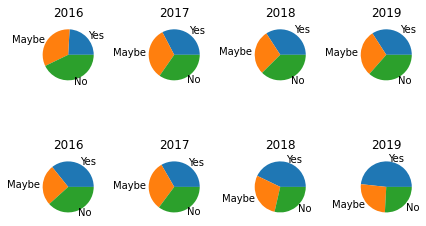

In [26]:
q_16_list_nontech = []
q_16_list_tech = []

#q_17_list.append(q_17(data_16.query('9 == 1',inplace=True)))
q_16_list_nontech.append(q_16(data_16_n))
q_16_list_nontech.append(q_16(data_17_n))
q_16_list_nontech.append(q_16(data_18_n))
q_16_list_nontech.append(q_16(data_19_n))

q_16_list_tech.append(q_16(data_16_t))
q_16_list_tech.append(q_16(data_17_t))
q_16_list_tech.append(q_16(data_18_t))
q_16_list_tech.append(q_16(data_19_t))

years = [2016,2017,2018,2019]
plt.plot(years,q_16_list_nontech)
plt.plot(years,q_16_list_tech)

pie_16_list16_t = pie_16(data_16_t)
pie_16_list16_n = pie_16(data_16_n)
pie_16_list17_t = pie_16(data_17_t)
pie_16_list17_n = pie_16(data_17_n)
pie_16_list18_t = pie_16(data_18_t)
pie_16_list18_n = pie_16(data_18_n)
pie_16_list19_t = pie_16(data_19_t)
pie_16_list19_n = pie_16(data_19_n)
answers = ['Yes','Maybe','No']
# referenced https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
plt.title('Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?')
print('Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? Tech vs Non Tech')
plt.subplot(2,4,1)
plt.pie(pie_16_list16_t,labels=answers)
plt.title('2016')
plt.subplot(2,4,2)
plt.pie(pie_16_list17_t,labels=answers)
plt.title('2017')
plt.subplot(2,4,3)
plt.pie(pie_16_list18_t,labels=answers)
plt.title('2018')
plt.subplot(2,4,4)
plt.pie(pie_16_list19_t,labels=answers)
plt.title('2019')
plt.subplot(2,4,5)
plt.pie(pie_16_list16_n,labels=answers)
plt.title('2016')
plt.subplot(2,4,6)
plt.pie(pie_16_list17_n,labels=answers)
plt.title('2017')
plt.subplot(2,4,7)
plt.pie(pie_16_list18_n,labels=answers)
plt.title('2018')
plt.subplot(2,4,8)
plt.pie(pie_16_list19_n,labels=answers)
plt.title('2019')
plt.tight_layout()

Text(0.5, 1.0, 'Does your employer offer resources to learn more about mental health disorders and options for seeking ')

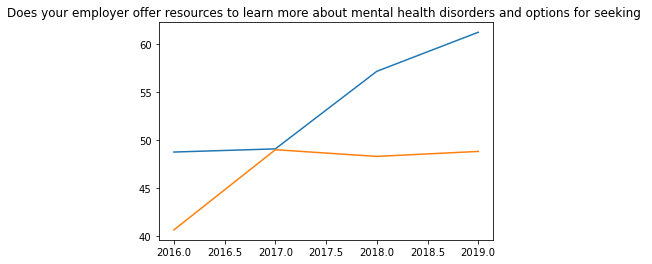

In [27]:
plt.plot(years,q_16_list_nontech)
plt.plot(years,q_16_list_tech)
plt.title('Does your employer offer resources to learn more about mental health disorders and options for seeking ')

In [28]:
def convert_56(data):
    index = 0
    index_list = data.index
    for row in data['69']:
        if row == 'Mental health':
            data.replace(row,50,inplace=True)
        elif row == 'Physical health':
            data.replace(row,0,inplace=True)
        elif row == 'Same level of comfort for each':
            data.replace(row,100,inplace=True)
        elif str(row) == 'nan':
            data.drop(index=index_list[index],inplace=True)
        index += 1
    return data

In [29]:
def convert_16(data):
    index = 0
    index_list = data.index
    for row in data['16']:
        if row == 'Yes':
            data.replace(row,100,inplace=True)
        elif row == 'I don\'t know':
            data.replace(row,50,inplace=True)
        elif row == 'No':
            data.replace(row,0,inplace=True)
        elif str(row) == 'nan':
            data.drop(index=index_list[index],inplace=True)
        index += 1
    return data

In [30]:
def convert_17(data):
    index = 0
    index_list = data.index
    for row in data['19']:
        if row == 'Yes':
            data.replace(row,100,inplace=True)
        elif row == 'Maybe':
            data.replace(row,50,inplace=True)
        elif row == 'No':
            data.replace(row,0,inplace=True)
        elif str(row) == 'nan':
            data.drop(index=index_list[index],inplace=True)
        index += 1
    return data

In [31]:
def convert_18(data):
    index = 0
    index_list = data.index
    for row in data['18']:
        if row == 'Yes':
            data.replace(row,100,inplace=True)
        elif row == 'Maybe':
            data.replace(row,50,inplace=True)
        elif row == 'No':
            data.replace(row,0,inplace=True)
        elif str(row) == 'nan':
            data.drop(index=index_list[index],inplace=True)
        index += 1
    return data

In [32]:
def convert_72(data):
    index = 0
    index_list = data.index
    for row in data['85']:
        if row == 1:
            data.replace(row,0,inplace=True)
        elif row == 2:
            data.replace(row,25,inplace=True)
        elif row == 3:
            data.replace(row,50,inplace=True)
        elif row == 4:
            data.replace(row,75,inplace=True)
        elif row == 5:
            data.replace(row,100,inplace=True)
        elif str(row) == 'nan':
            data.drop(index=index_list[index],inplace=True)
        index += 1
    return data

In [33]:
data_17_t = convert_72(data_17_t)
data_18_t = convert_72(data_18_t)
data_19_t = convert_72(data_19_t)

data_16_t = convert_16(data_16_t)
data_17_t = convert_16(data_17_t)
data_18_t = convert_16(data_18_t)
data_19_t = convert_16(data_19_t)

data_16_t = convert_17(data_16_t)
data_17_t = convert_17(data_17_t)
data_18_t = convert_17(data_18_t)
data_19_t = convert_17(data_19_t)

data_16_t = convert_18(data_16_t)
data_17_t = convert_18(data_17_t)
data_18_t = convert_18(data_18_t)
data_19_t = convert_18(data_19_t)


data_17_t = convert_56(data_17_t)
data_18_t = convert_56(data_18_t)
data_19_t = convert_56(data_19_t)


In [34]:
from sklearn.linear_model import LinearRegression
data_17_t = pd.DataFrame(data_17_t)
#print(data_17_t.index)
X = np.array(data_17_t['69']).reshape(-1,1)

lin_reg = LinearRegression().fit(X,data_17_t['85'])
y = data_17_t['85']
print('score:',lin_reg.score(X,data_17_t['85']))
X = data_17_t['69']
print('correlation:',X.corr(y))

score: 0.004316866088233784
correlation: 0.06570286210077773


In [35]:
data_18_t = pd.DataFrame(data_18_t)
#print(data_17_t.index)
X = np.array(data_18_t['69']).reshape(-1,1)

lin_reg = LinearRegression().fit(X,data_18_t['85'])
y = data_18_t['85']
print('score:',lin_reg.score(X,data_18_t['85']))
X = data_18_t['69']
print('correlation:',X.corr(y))

score: 0.05335696594748085
correlation: 0.23099126811955642


In [36]:
data_19_t = pd.DataFrame(data_19_t)
#print(data_17_t.index)
X = np.array(data_19_t['69']).reshape(-1,1)

lin_reg = LinearRegression().fit(X,data_19_t['85'])
y = data_19_t['85']
print('score:',lin_reg.score(X,data_19_t['85']))
X = data_19_t['69']
print('correlation:',X.corr(y))

score: 0.001488488599249882
correlation: 0.038580935696920025


In [37]:
data_16_t = pd.DataFrame(data_16_t)
#print(data_17_t.index)
X = np.array(data_16_t['16']).reshape(-1,1)

lin_reg = LinearRegression().fit(X,data_16_t['19'])
y = data_16_t['19']
print('score:',lin_reg.score(X,data_16_t['19']))
X = data_16_t['16']
print('correlation:',X.corr(y))

score: 0.00892958551337486
correlation: 0.09449648413234749


In [38]:
data_17_t = pd.DataFrame(data_17_t)
#print(data_17_t.index)
X = np.array(data_17_t['16']).reshape(-1,1)

lin_reg = LinearRegression().fit(X,data_17_t['19'])
y = data_17_t['19']
print('score:',lin_reg.score(X,data_17_t['19']))
X = data_17_t['16']
print('correlation:',X.corr(y))

score: 0.014374420501350516
correlation: 0.11989337138203492
